In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [12]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)
# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
df_market_data = pd.read_csv('Resources/crypto_market_data.csv')

# Copy the 'coin_id' column before scaling
coin_ids = df_market_data['coin_id'].copy()

# Drop 'coin_id' from the DataFrame before scaling
df_market_data.drop(columns='coin_id', inplace=True)

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Convert the scaled data back to a DataFrame
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Add the 'coin_id' column back to the DataFrame
df_market_data_scaled['coin_id'] = coin_ids

# Set 'coin_id' as the index
df_market_data_scaled.set_index('coin_id', inplace=True)

# Display the first few rows of the DataFrame
df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [13]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
# Print the list to verify
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [16]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data
    kmeans.fit(df_market_data_scaled)
    
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Print the inertia values for each k
print(inertia_list)

C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[287.0, 198.57181809798124, 123.19048183836958, 79.02243535120975, 65.302379141625, 52.10180599356482, 46.03525005555019, 37.28480659404661, 32.16141710107242, 28.075252677898874, 23.890044355377952]


In [17]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

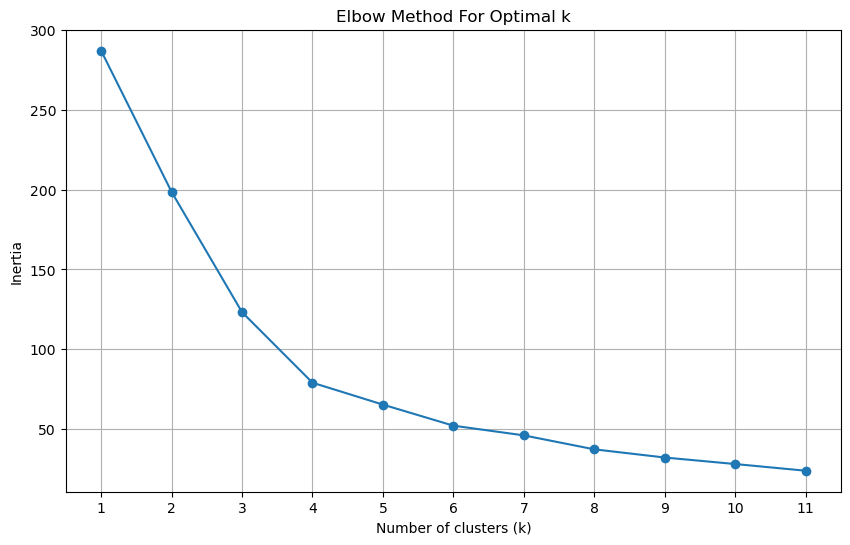

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Assuming inertia and k_values are already defined
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [20]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)


In [21]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_market_data_scaled)

C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [22]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [23]:
# Create a copy of the DataFrame
df_market_data_with_clusters = df_market_data.copy()

In [24]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_with_clusters['cluster'] = clusters

# Display sample data
df_market_data_with_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [60]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas  # Import hvplot
# Create a scatter plot
scatter_plot_Original = df_market_data_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='cluster', 
    hover_cols=['coin_id'],  # Assuming 'coin_id' is the column with the cryptocurrency names
    title='Cryptocurrency Clusters based on 24h and 7d Price Change Percentages'
)

scatter_plot_Original

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [28]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [41]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_market_data_pca = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
df_market_data_pca = pd.DataFrame(df_market_data_pca, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_scaled.index)

df_market_data_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [30]:
# Retrieve the explained variance to determine how much information 
explained_variance = pca.explained_variance_ratio_

# can be attributed to each principal component.
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.2f}")

Principal Component 1: 0.37
Principal Component 2: 0.35
Principal Component 3: 0.18


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.37 (PC1) + 0.35 (PC2) + 0.18 (PC3) = 0.90 

In [42]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
# Create a new DataFrame with the PCA data
df_pca_with_names = pd.DataFrame(df_market_data_pca, columns=['PC1', 'PC2', 'PC3'])

# Check if 'coin_ids' needs to be reset (in case its index doesn't match)
if not df_pca_with_names.index.equals(coin_ids.index):
    coin_ids = coin_ids.reset_index(drop=True)

# Add the crypto names to the PCA DataFrame
df_pca_with_names['coin_id'] = coin_ids

# Set 'coin_id' as the index of the new DataFrame
df_pca_with_names.set_index('coin_id', inplace=True)

# Display the first few rows of the new DataFrame
df_pca_with_names.head()


,PC1,PC2,PC3
coin_id,,,
NaN,-0.600667,0.842760,0.461595
NaN,-0.458261,0.458466,0.952877
NaN,-0.433070,-0.168126,-0.641752
NaN,-0.471835,-0.222660,-0.479053
NaN,-1.157800,2.041209,1.859715


In [44]:

# First, let's reapply PCA using the correctly indexed scaled data
df_market_data_pca = pca.fit_transform(df_market_data_scaled)

# Now, create a DataFrame from the PCA results
# Using the index from the original data (which should be 'coin_id')
df_pca_with_names = pd.DataFrame(df_market_data_pca, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Let's check the first few rows to ensure 'coin_id' is correctly used as the index
df_pca_with_names.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [45]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list to verify
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [46]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Fit the model to the data using df_market_data_pca
    kmeans.fit(df_market_data_pca)

    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Now you have the inertia values for each k
print(inertia)

C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[256.8740855678926, 168.8118963068523, 93.77462568057305, 49.66549665179739, 37.83946598681245, 27.72062619489982, 21.182775862957342, 17.016962140077435, 13.668324883664063, 10.48489048597693, 7.98435481189623]


In [47]:
# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {'k': k_values, 'inertia': inertia}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dict)

# Now you have a DataFrame ready for plotting the Elbow curve
print(elbow_df)

     k     inertia
0    1  256.874086
1    2  168.811896
2    3   93.774626
3    4   49.665497
4    5   37.839466
5    6   27.720626
6    7   21.182776
7    8   17.016962
8    9   13.668325
9   10   10.484890
10  11    7.984355


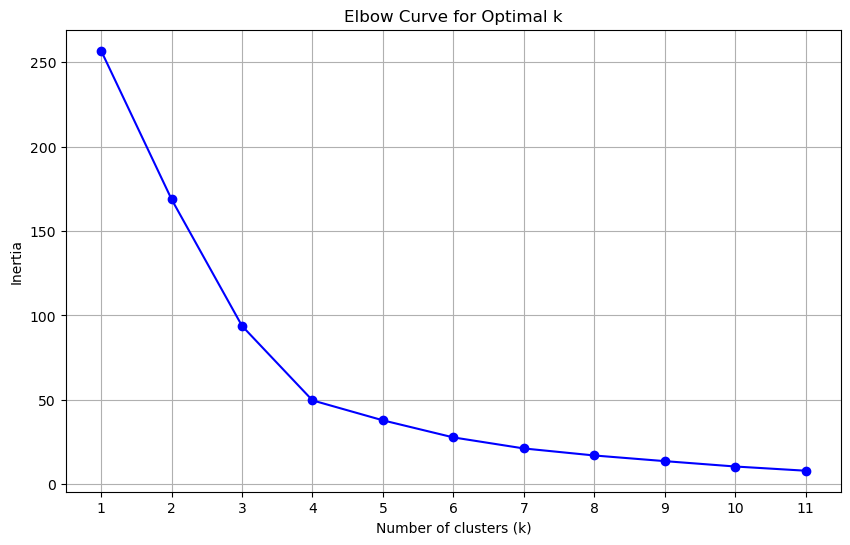

In [48]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 5


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  In summary:
Best k value using original data: 4
Best k value using PCA-transformed data: 5
This difference illustrates the impact of dimensionality reduction on clustering and highlights the importance of experimenting with both original and transformed data to find the most meaningful clustering solution.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [49]:
# Initialize the K-Means model using the best value for k
optimal_k = 5
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)

In [50]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_crypto_pca)


C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mrpea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [51]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = kmeans_model.predict(df_crypto_pca)

# Print the resulting array of cluster values.
print(cluster_predictions)

[0 0 4 4 0 0 0 0 0 4 1 4 4 0 4 0 1 4 0 4 4 0 4 4 4 4 4 1 0 1 4 4 2 0 1 4 3
 1 4 4 4]


In [52]:
# Create a copy of the DataFrame
df_crypto_pca_clustered = df_crypto_pca.copy()

# Add a new column with the predicted clusters
df_crypto_pca_clustered['cluster'] = cluster_predictions

# Display sample data
df_crypto_pca_clustered.head()


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,4
ripple,-0.471835,-0.222660,-0.479053,4
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [59]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_crypto_pca_clustered.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='cluster', 
    hover_cols=['crypto_name'],  # Replace 'crypto_name' with the actual column name
    title='Cryptocurrency Clusters based on PCA',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    colormap='Category10'
)

# Display the plot
scatter_plot_pca

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

NameError: name 'k_values_original' is not defined

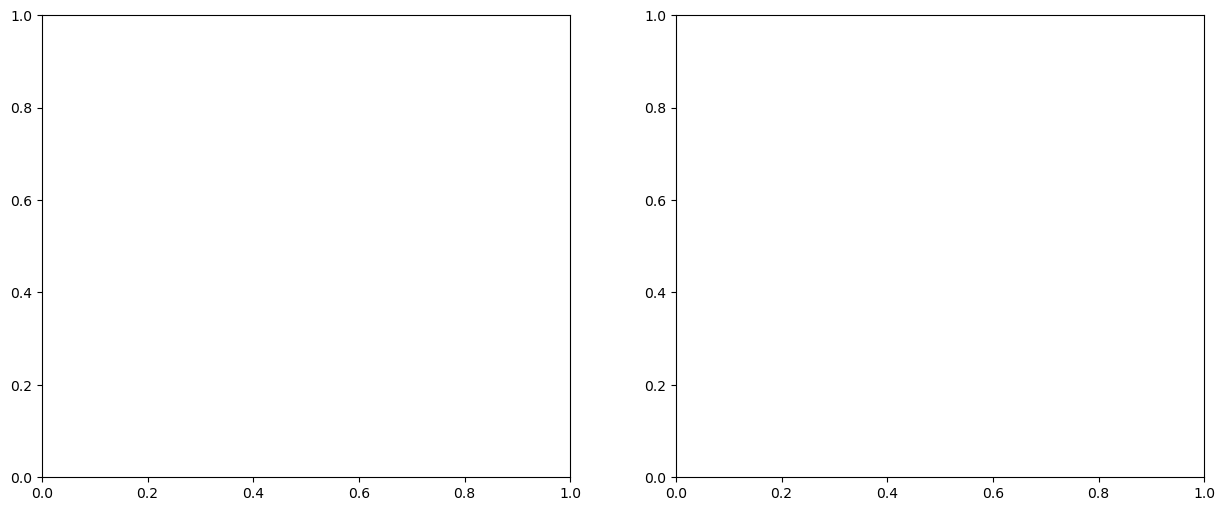

In [54]:
# Composite plot to contrast the Elbow curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the Elbow curve for the original data
ax1.plot(k_values_original, inertia_original, marker='o', linestyle='-', color='b')
ax1.set_title('Elbow Curve for Original Data')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.grid(True)

# Plot the Elbow curve for the PCA data
ax2.plot(k_values_pca, inertia_pca, marker='o', linestyle='-', color='r')
ax2.set_title('Elbow Curve for PCA Data')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Inertia')
ax2.grid(True)

# Display the composite plot
plt.tight_layout()
plt.show()

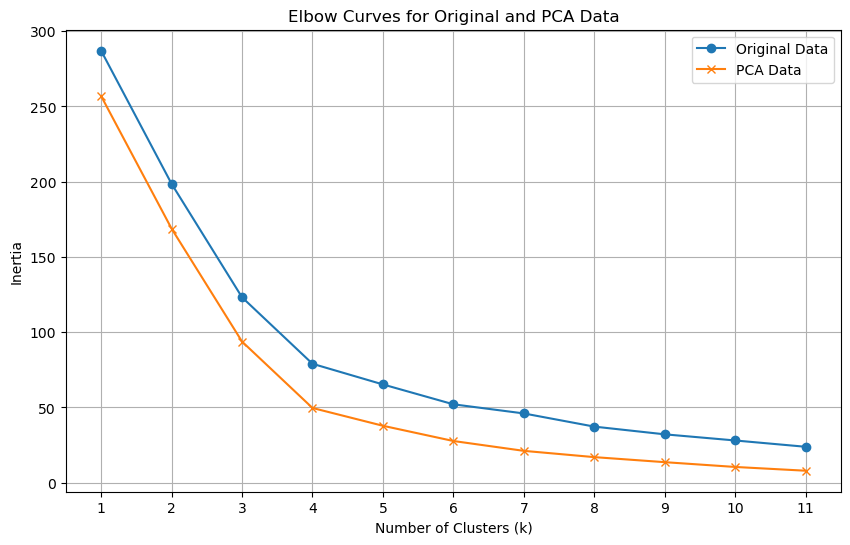

In [57]:
import matplotlib.pyplot as plt

# Assuming you have already calculated inertia values for original and PCA data
# Let's say inertia_original and inertia_pca are the lists of inertia values
k_values = range(1, 12)

# Plotting both Elbow curves
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_list, label='Original Data', marker='o')
plt.plot(k_values, inertia, label='PCA Data', marker='x')

# Adding labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curves for Original and PCA Data')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [61]:
# Composite plot to contrast the clusters
scatter_plot_Original + scatter_plot_pca


:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** We can conclude use less features and get similar performance to the original model since we can clearly identify four clusters. Additionaly the reduced number of columns make it easier visualize the value of the clustering tradeoffs is 10 of important information from the data is lossed when doing pca.
  